In [1]:
## importing the required libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # statsmodels  

In [2]:
# Reading the data 
df =  pd.read_csv("AirPassengers.csv", index_col=0) 
#In any time series problem - We need to keep the date time column as index, hence we are converting the index 
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
# minimum data for which we have the data 
df.index.min()

'1949-01'

In [4]:
# maximum data for which we have the data 
df.index.max()

'1960-12'

In [5]:
## We have the data from Jan, 1949 - Dec, 1960

In [6]:
## checking the data values available 
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [7]:
# checking the no of rows and columns of the dataframe 
df.shape

(144, 1)

In [8]:
## After checking the index of the data frame and the shape, we can conclude that the data is uniformly spaced data

In [9]:
df.index = pd.to_datetime(df.index)  
#### This is very imp - >>> Date or Datetime as index -- convert that into proper datetime
# pd.to_datetime

In [10]:
## checking the values of index,post converting the index to datetime
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
#renaiming the columns 
df.columns = ['No of Passengers']
df.head()

,No of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


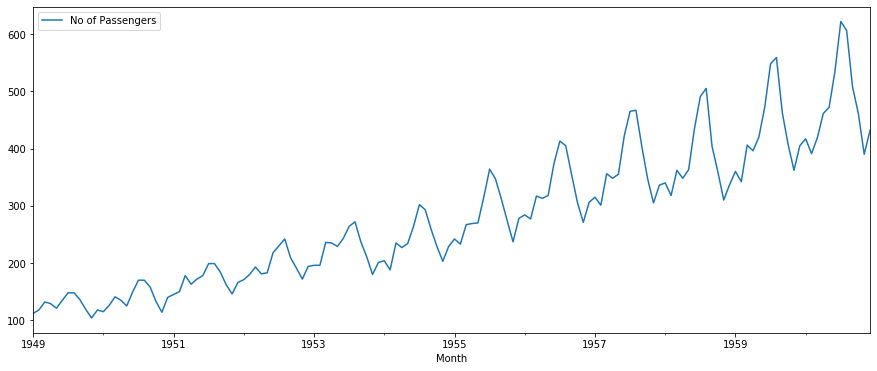

In [12]:
## plotting the graph of the time series data to see the traneds, seasonality present in the data 
df.plot(figsize = (15,6))

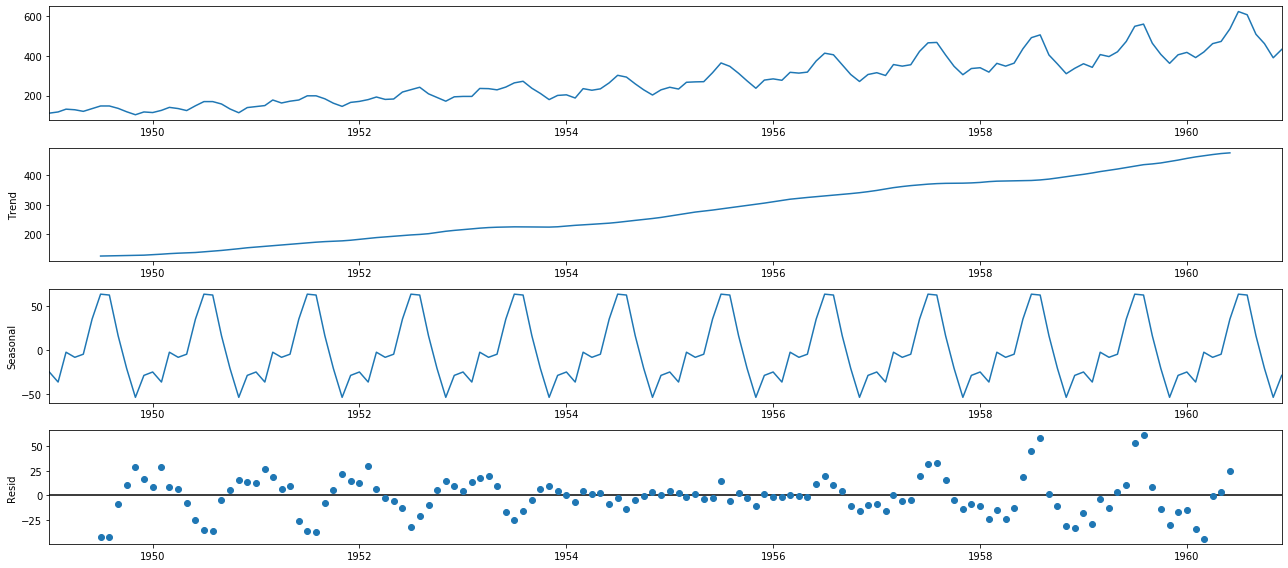

In [13]:
## another way to see the seasonality and trends present in the data is via seasonal.decompose method, as follows: 
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

In [14]:
## the output of the seasonal.decompose consists of 4 graphs:  
## first is the actualy graph of the data shrinked into small size 
## Second graph is showing you a trend line 
## third graph is the seasonality graph
## fourth graph is basically the noise part which you may not be able to predict completely

## Simple Moving Average Model

In [15]:
## printing the top 20 records of the data 
df.head(n=20)

,No of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [16]:
## Window Function in pandas 
## windows size as 2

In [17]:
df_ma2 = df.copy()
# windows function 
# rolling 
df_ma2['SMA_2'] = df_ma2.rolling(window = 2).mean()
df_ma2.head(20)

,No of Passengers,SMA_2
Month,,
1949-01-01,112,NaN
1949-02-01,118,115.0
1949-03-01,132,125.0
1949-04-01,129,130.5
1949-05-01,121,125.0
1949-06-01,135,128.0
1949-07-01,148,141.5
1949-08-01,148,148.0
1949-09-01,136,142.0


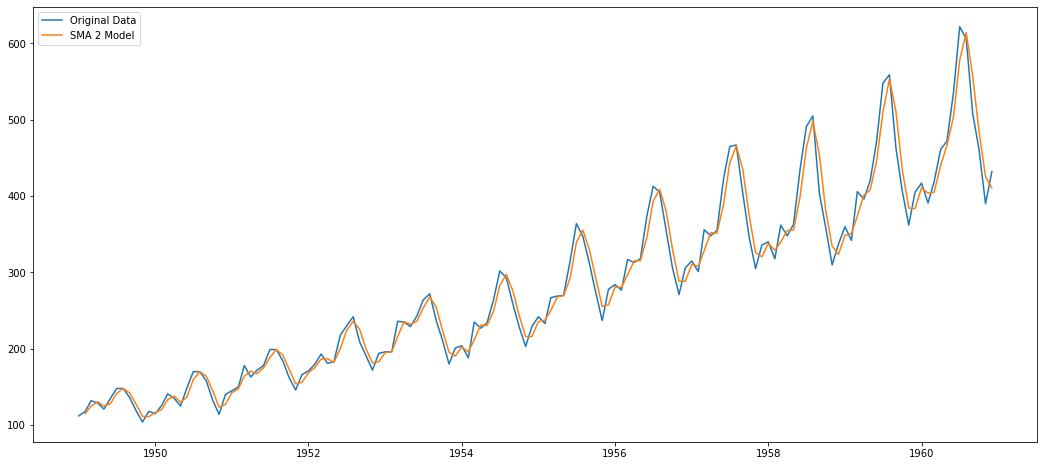

In [18]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma2['No of Passengers'], label = 'Original Data')
plt.plot(df_ma2['SMA_2'], label = "SMA 2 Model")
plt.legend()

In [19]:
## Acutual - Predicted 
# mape - Mean absolute percentage error 
#Mean(AbS(( A - P) A )*100

## defining function to calculate the mape

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100

In [20]:
## calculate the mape 
mape(df_ma2['No of Passengers'], df_ma2['SMA_2'])

4.509723850655714

In [21]:
## Window size as 3

In [22]:
df_ma3 = df.copy() 
df_ma3['SMA_3'] = df_ma3.rolling(window = 3).mean()
df_ma3.head(20)

,No of Passengers,SMA_3
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
1949-06-01,135,128.333333
1949-07-01,148,134.666667
1949-08-01,148,143.666667
1949-09-01,136,144.000000


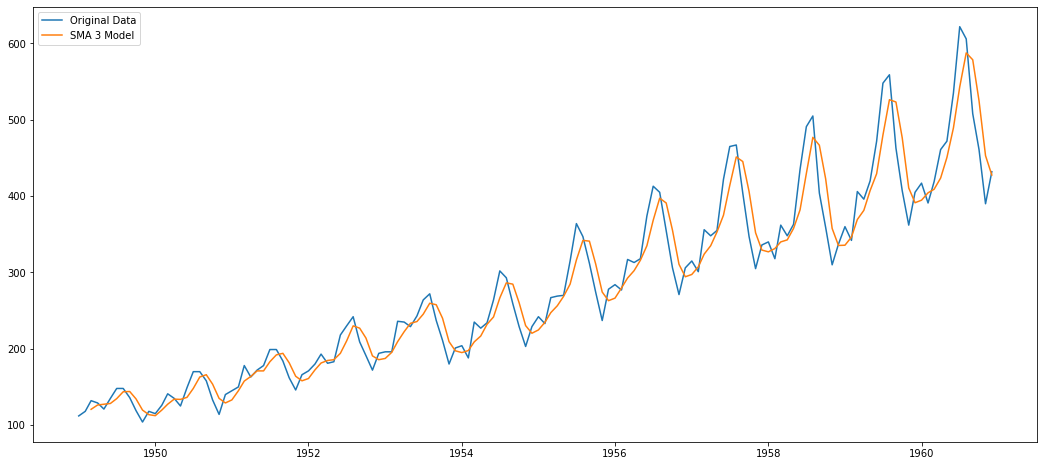

In [23]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma3['No of Passengers'], label = 'Original Data')
plt.plot(df_ma3['SMA_3'], label = "SMA 3 Model")
plt.legend()

In [24]:
## calculate the mape 
mape(df_ma3['No of Passengers'], df_ma3['SMA_3'])

7.346647238927541

In [25]:
## window size 4

In [26]:
df_ma4 = df.copy()
df_ma4['SMA_4'] = df_ma4.rolling(window = 4).mean()
df_ma4.head(20)

,No of Passengers,SMA_4
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,122.75
1949-05-01,121,125.00
1949-06-01,135,129.25
1949-07-01,148,133.25
1949-08-01,148,138.00
1949-09-01,136,141.75


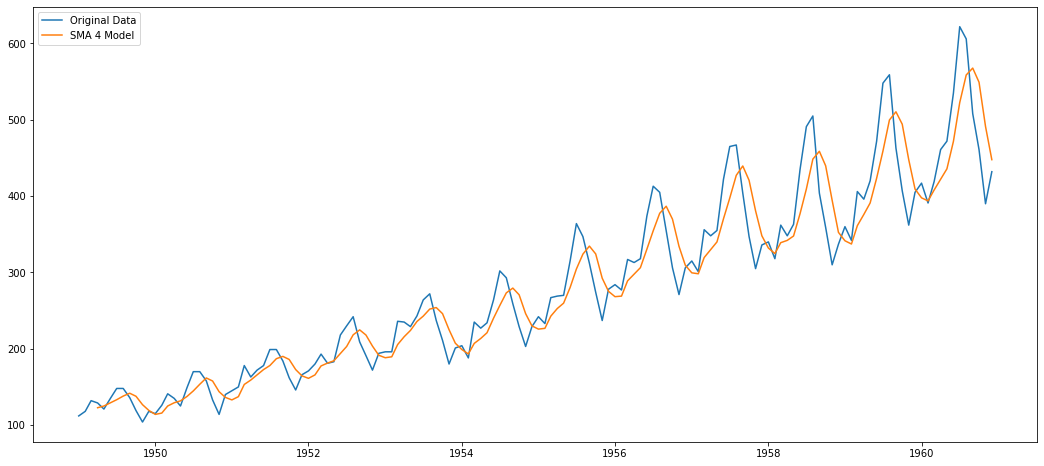

In [27]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma4['No of Passengers'], label = 'Original Data')
plt.plot(df_ma4['SMA_4'], label = "SMA 4 Model")
plt.legend()

In [28]:
## calculating mape 
mape(df_ma4['No of Passengers'], df_ma4['SMA_4'])

9.187719963528176

In [29]:
## window size as 5

In [30]:
df_ma5 = df.copy()
df_ma5['SMA_5'] = df_ma5.rolling(window = 5).mean()
df_ma5.head(20)

,No of Passengers,SMA_5
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,122.4
1949-06-01,135,127.0
1949-07-01,148,133.0
1949-08-01,148,136.2
1949-09-01,136,137.6


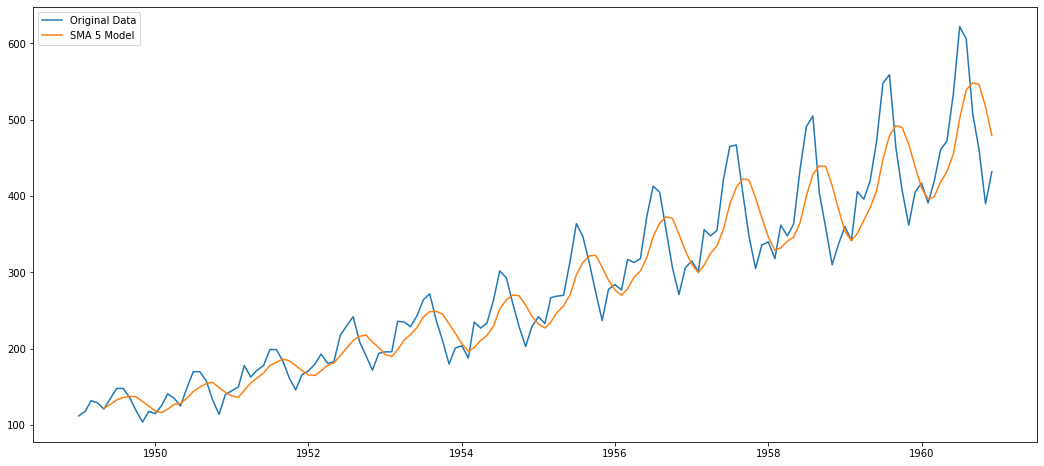

In [31]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma5['No of Passengers'], label = 'Original Data')
plt.plot(df_ma5['SMA_5'], label = "SMA 5 Model")
plt.legend()

In [32]:
## calculating the mape
mape(df_ma5['No of Passengers'], df_ma5['SMA_5'])

10.603771352445019

In [33]:
## window size as 6

In [34]:
df_ma6 = df.copy() 
df_ma6['SMA_6'] = df_ma6.rolling(window = 6).mean()
df_ma6.head(20)

,No of Passengers,SMA_6
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,124.500000
1949-07-01,148,130.500000
1949-08-01,148,135.500000
1949-09-01,136,136.166667


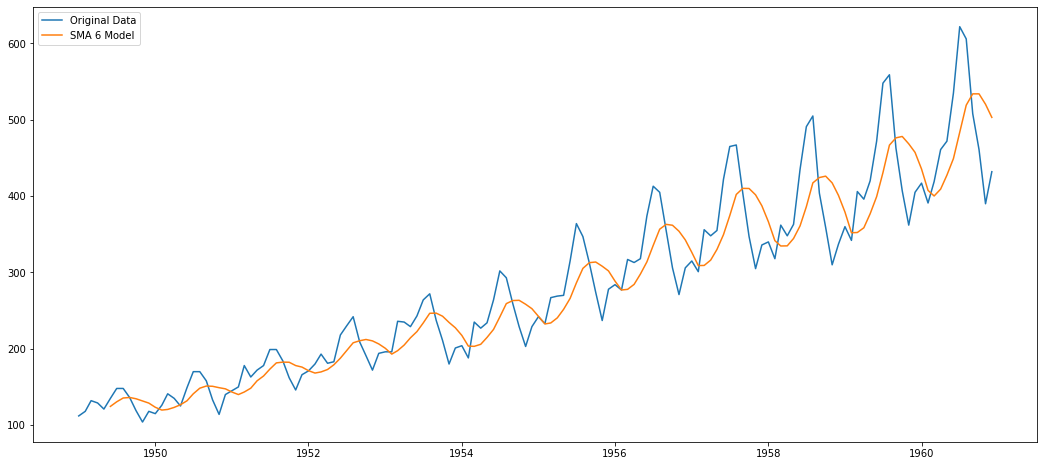

In [35]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma6['No of Passengers'], label = 'Original Data')
plt.plot(df_ma6['SMA_6'], label = "SMA 6 Model")
plt.legend()

In [36]:
## calculating the mape
mape(df_ma6['No of Passengers'], df_ma6['SMA_6'])

11.610217609232771

In [37]:
## Window size as 7

In [38]:
df_ma7 = df.copy()
df_ma7['SMA_7'] = df_ma7.rolling(window = 7).mean()
df_ma7.head(20)

,No of Passengers,SMA_7
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,127.857143
1949-08-01,148,133.000000
1949-09-01,136,135.571429


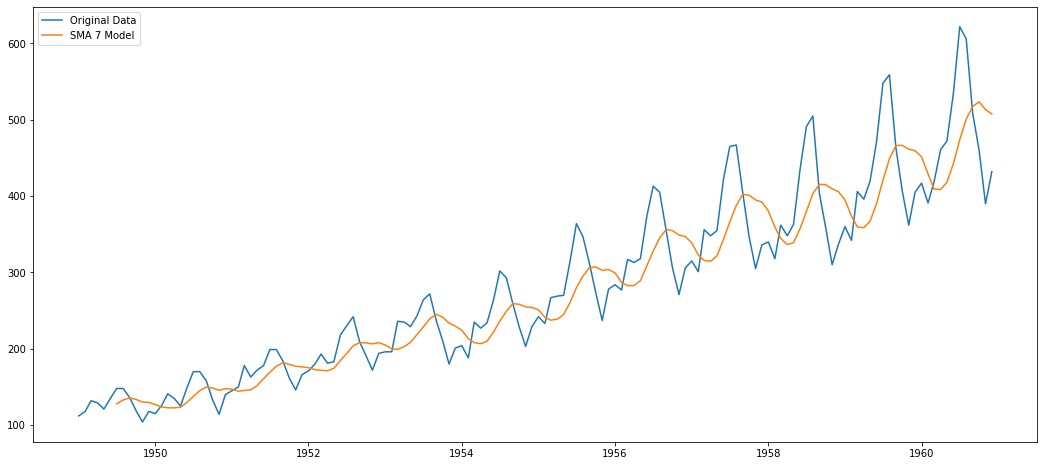

In [39]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma7['No of Passengers'], label = 'Original Data')
plt.plot(df_ma7['SMA_7'], label = "SMA 7 Model")
plt.legend()

In [40]:
## calculating the mape
mape(df_ma7['No of Passengers'], df_ma7['SMA_7'])

12.32225594988382

In [41]:
## Window size as 8

In [42]:
df_ma8 = df.copy()
df_ma8['SMA_8'] = df_ma8.rolling(window = 8).mean()
df_ma8.head(20)

,No of Passengers,SMA_8
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,130.375
1949-09-01,136,133.375


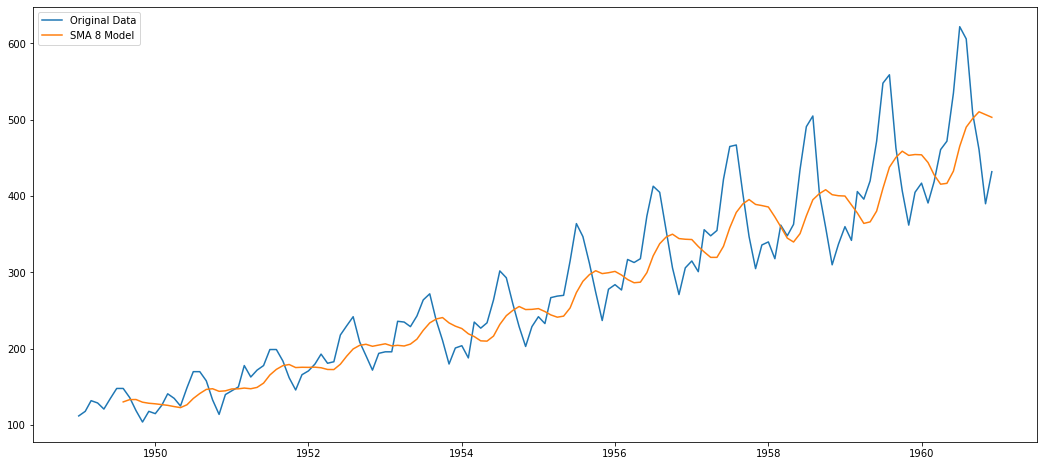

In [43]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma8['No of Passengers'], label = 'Original Data')
plt.plot(df_ma8['SMA_8'], label = "SMA 8 Model")
plt.legend()

In [44]:
## calculating the mape
mape(df_ma8['No of Passengers'], df_ma8['SMA_8'])

12.513798936616883

In [45]:
## Window size as 9

In [46]:
df_ma9 = df.copy()
df_ma9['SMA_9'] = df_ma9.rolling(window = 9).mean()
df_ma9.head(20)

,No of Passengers,SMA_9
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,131.000000


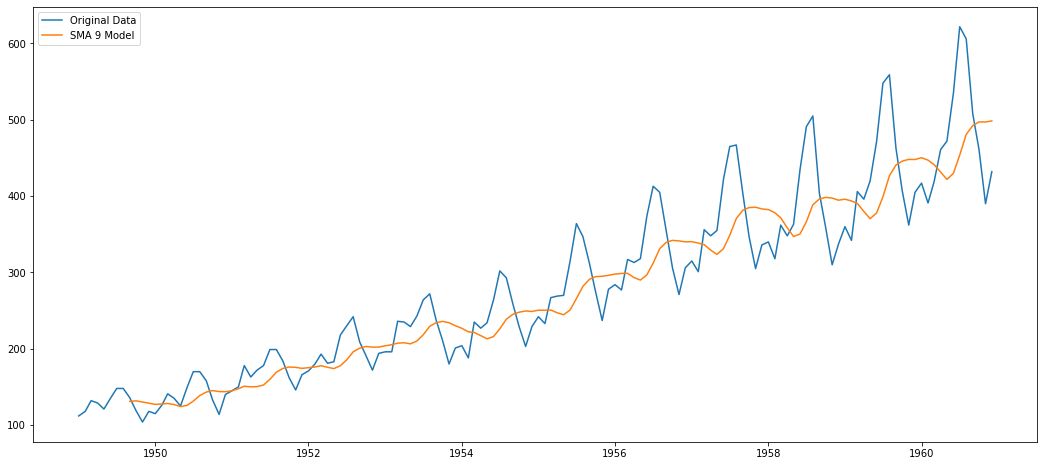

In [47]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma9['No of Passengers'], label = 'Original Data')
plt.plot(df_ma9['SMA_9'], label = "SMA 9 Model")
plt.legend()

In [48]:
## calculating the mape
mape(df_ma9['No of Passengers'], df_ma9['SMA_9'])

12.3154384661449

In [49]:
## Window size as 10

In [50]:
df_ma10 = df.copy()
df_ma10['SMA_10'] = df_ma10.rolling(window = 10).mean()
df_ma10.head(20)

,No of Passengers,SMA_10
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


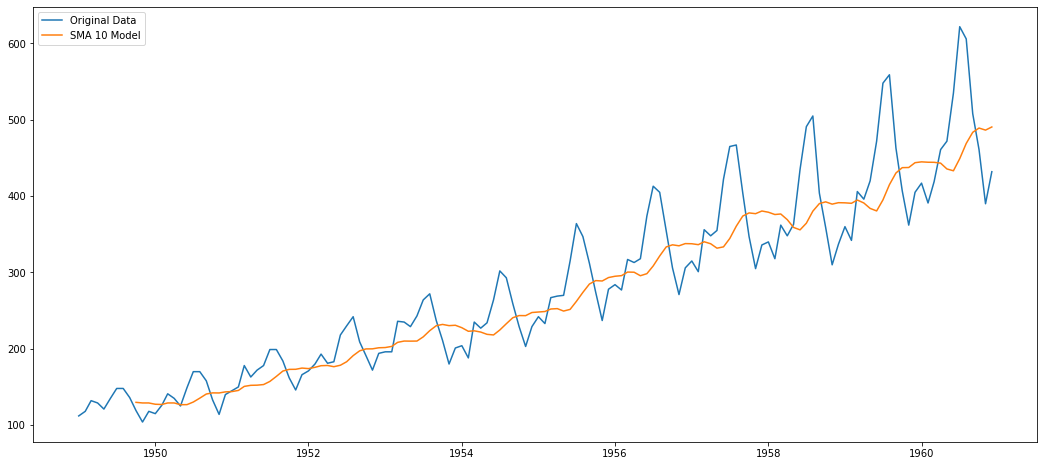

In [51]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma10['No of Passengers'], label = 'Original Data')
plt.plot(df_ma10['SMA_10'], label = "SMA 10 Model")
plt.legend()

In [52]:
## calculating the mape
mape(df_ma10['No of Passengers'], df_ma10['SMA_10'])

11.926648168851692

In [53]:
## Window size as 11

In [54]:
df_ma11 = df.copy()
df_ma11['SMA_11'] = df_ma11.rolling(window = 11).mean()
df_ma11.head(20)

,No of Passengers,SMA_11
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


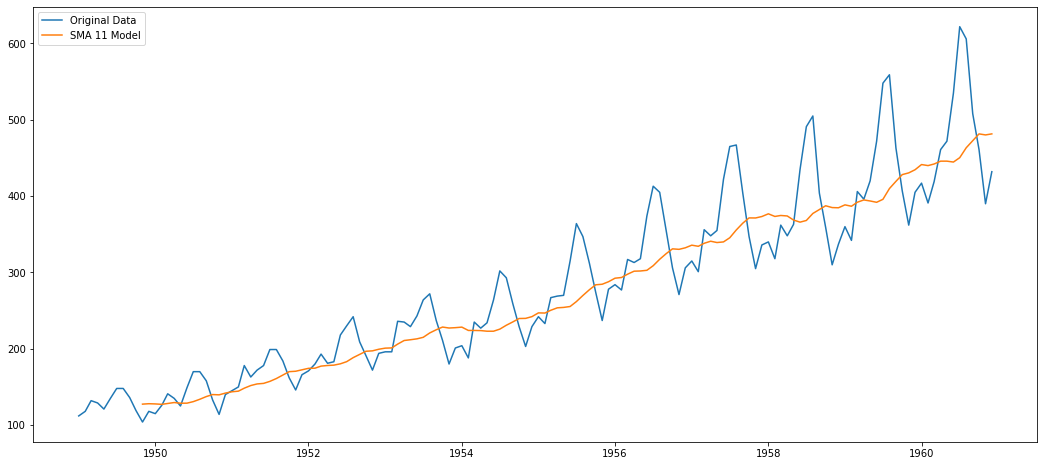

In [55]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma11['No of Passengers'], label = 'Original Data')
plt.plot(df_ma11['SMA_11'], label = "SMA 11 Model")
plt.legend()

In [56]:
## calculating the mape
mape(df_ma11['No of Passengers'], df_ma11['SMA_11'])

11.477882523410551

In [57]:
## Window size as 12

In [58]:
df_ma12 = df.copy()
df_ma12['SMA_12'] = df_ma12.rolling(window = 12).mean()
df_ma12.head(20)

,No of Passengers,SMA_12
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


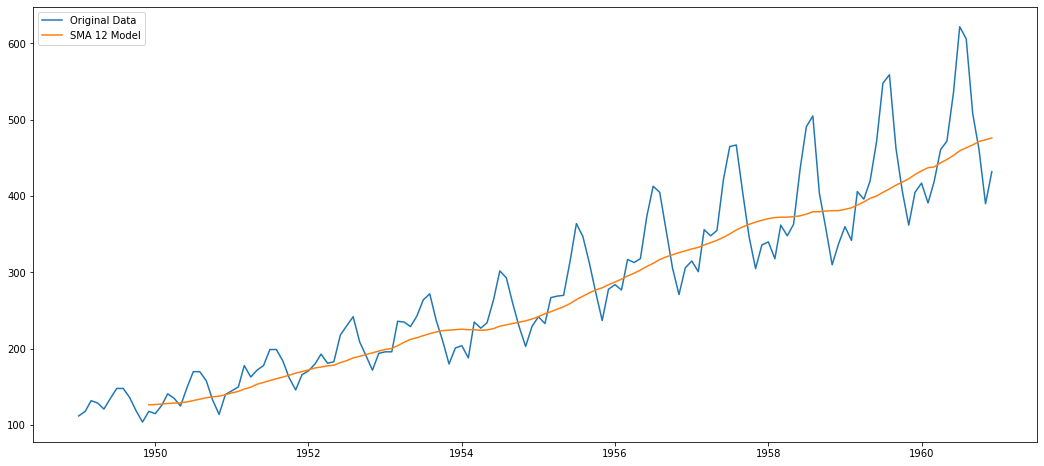

In [59]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma12['No of Passengers'], label = 'Original Data')
plt.plot(df_ma12['SMA_12'], label = "SMA 12 Model")
plt.legend()

In [60]:
## calculating the mape
mape(df_ma12['No of Passengers'], df_ma12['SMA_12'])

10.778519137583197

In [61]:
## Window size as 13

In [62]:
df_ma13 = df.copy()
df_ma13['SMA_13'] = df_ma13.rolling(window = 13).mean()
df_ma13.head(20)

,No of Passengers,SMA_13
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


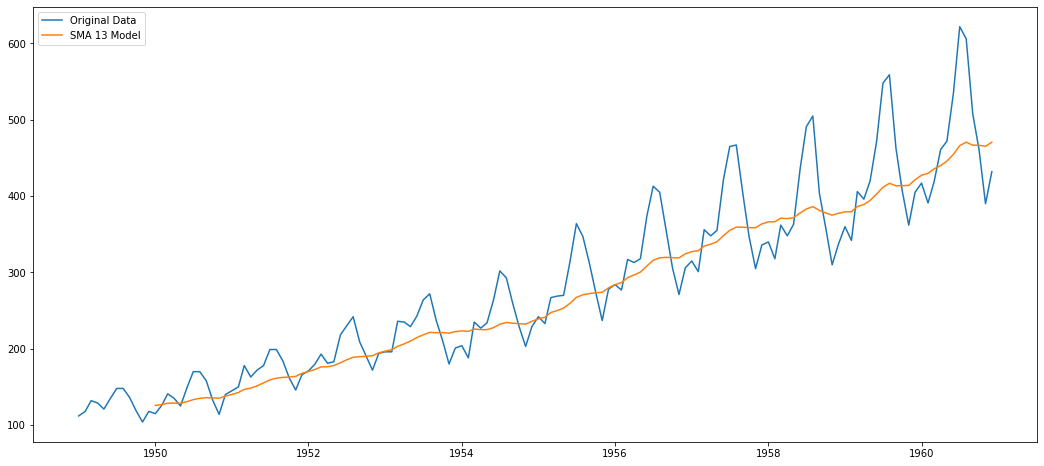

In [63]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma13['No of Passengers'], label = 'Original Data')
plt.plot(df_ma13['SMA_13'], label = "SMA 13 Model")
plt.legend()

In [64]:
## calculating the mape
mape(df_ma13['No of Passengers'], df_ma13['SMA_13'])

10.229846710827953

In [65]:
## Window size as 14

In [66]:
df_ma14 = df.copy()
df_ma14['SMA_14'] = df_ma14.rolling(window = 14).mean()
df_ma14.head(20)

,No of Passengers,SMA_14
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


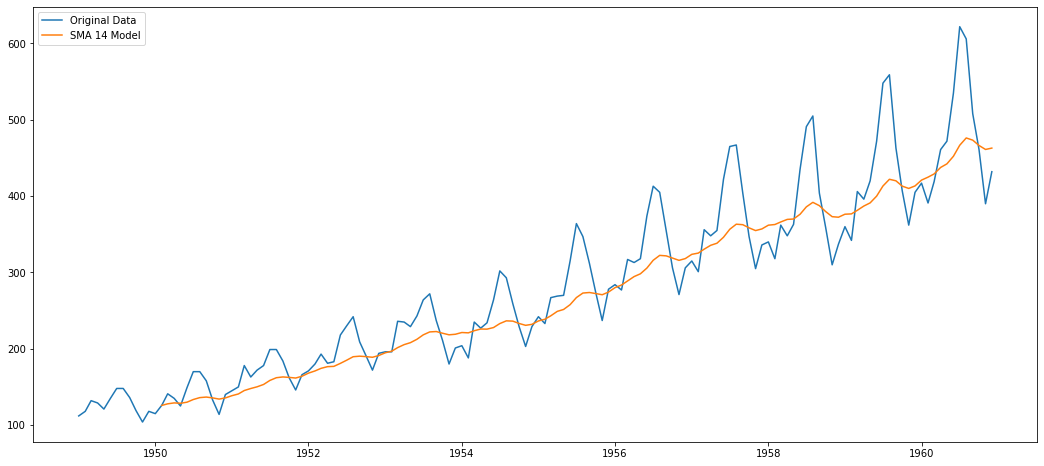

In [67]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma14['No of Passengers'], label = 'Original Data')
plt.plot(df_ma14['SMA_14'], label = "SMA 14 Model")
plt.legend()

In [68]:
## calculating the mape
mape(df_ma14['No of Passengers'], df_ma14['SMA_14'])

10.037405927425242

In [69]:
## Window size as 15

In [70]:
df_ma15 = df.copy()
df_ma15['SMA_15'] = df_ma15.rolling(window = 15).mean()
df_ma15.head(20)

,No of Passengers,SMA_15
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


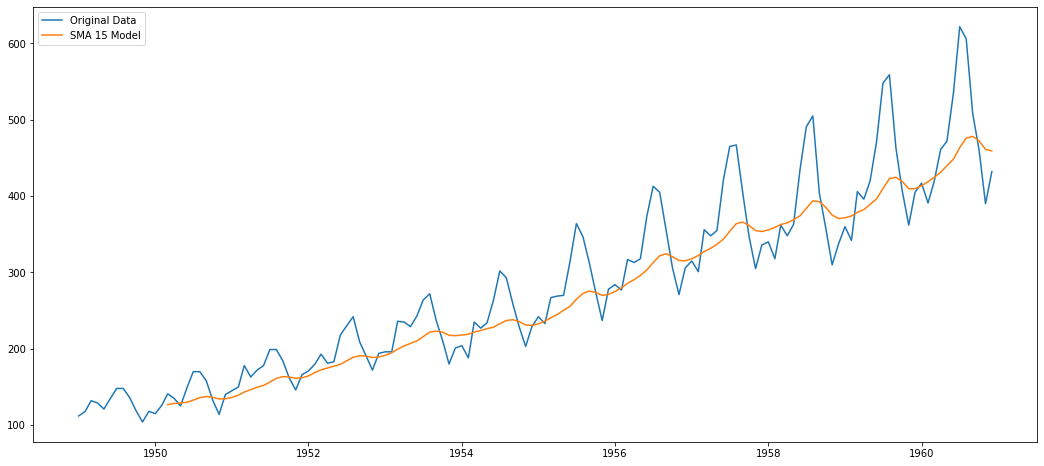

In [71]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma15['No of Passengers'], label = 'Original Data')
plt.plot(df_ma15['SMA_15'], label = "SMA 15 Model")
plt.legend()

In [72]:
## calculating the mape
mape(df_ma15['No of Passengers'], df_ma15['SMA_15'])

10.30970063812442

In [73]:
## window size as 16

In [74]:
df_ma16 = df.copy()
df_ma16['SMA_16'] = df_ma16.rolling(window = 16).mean()
df_ma16.head(20)

,No of Passengers,SMA_16
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


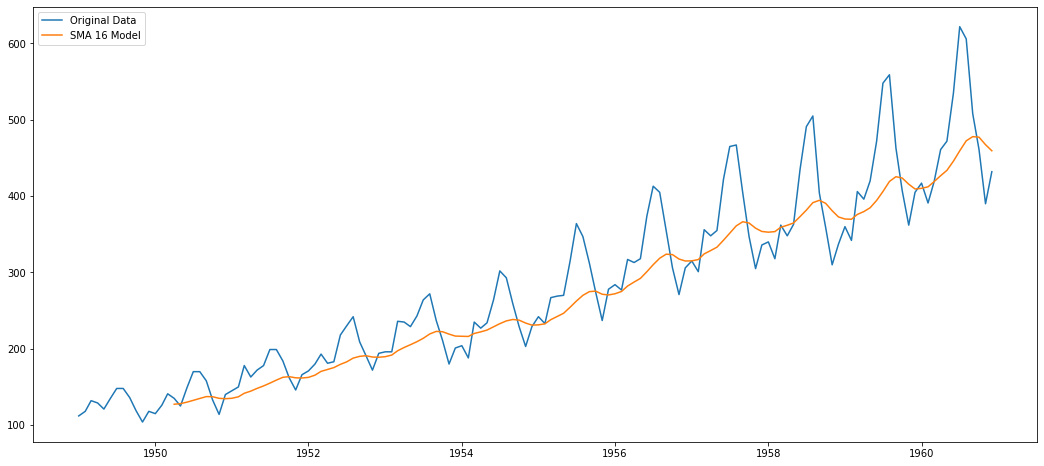

In [75]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma16['No of Passengers'], label = 'Original Data')
plt.plot(df_ma16['SMA_16'], label = "SMA 16 Model")
plt.legend()

In [76]:
## calculating the mape
mape(df_ma16['No of Passengers'], df_ma16['SMA_16'])

10.745090493921825

In [77]:
## window size as 17

In [78]:
df_ma17 = df.copy()
df_ma17['SMA_17'] = df_ma17.rolling(window = 17).mean()
df_ma17.head(20)

,No of Passengers,SMA_17
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


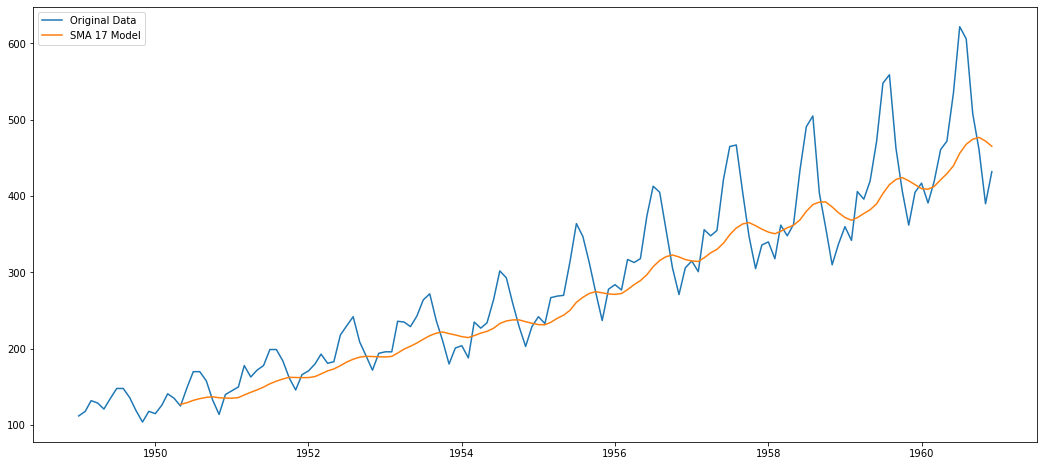

In [79]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma17['No of Passengers'], label = 'Original Data')
plt.plot(df_ma17['SMA_17'], label = "SMA 17 Model")
plt.legend()

In [80]:
## calculating the mape
mape(df_ma17['No of Passengers'], df_ma17['SMA_17'])

11.353637224049821

In [81]:
## window size as 18

In [82]:
df_ma18 = df.copy()
df_ma18['SMA_18'] = df_ma18.rolling(window = 18).mean()
df_ma18.head(20)

,No of Passengers,SMA_18
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


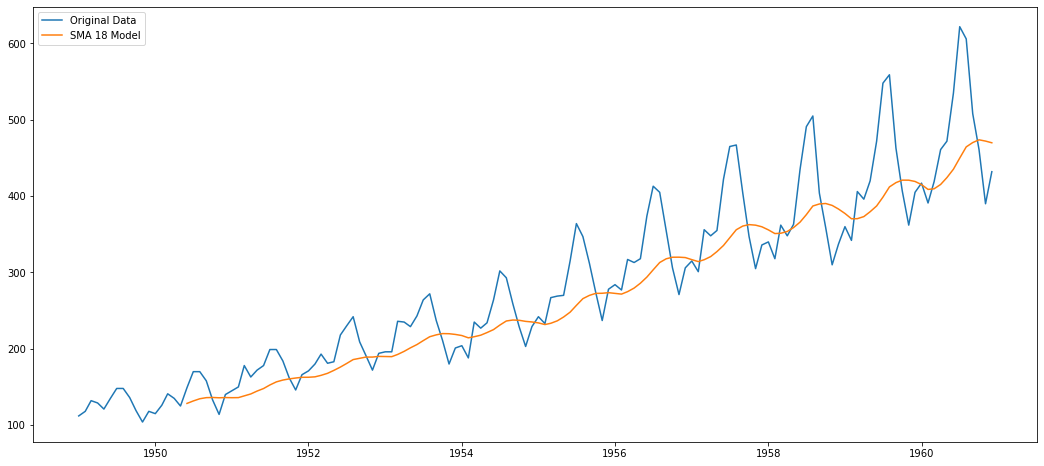

In [83]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma18['No of Passengers'], label = 'Original Data')
plt.plot(df_ma18['SMA_18'], label = "SMA 18 Model")
plt.legend()

In [84]:
## calculating the mape
mape(df_ma18['No of Passengers'], df_ma18['SMA_18'])

11.876588285475998

In [85]:
## window size as 19

In [86]:
df_ma19 = df.copy()
df_ma19['SMA_19'] = df_ma19.rolling(window = 19).mean()
df_ma19.head(20)

,No of Passengers,SMA_19
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


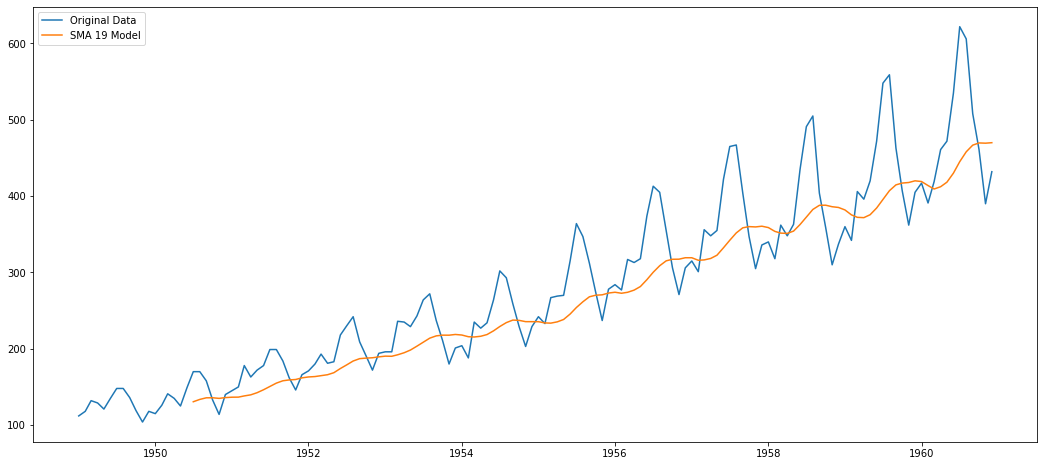

In [87]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma19['No of Passengers'], label = 'Original Data')
plt.plot(df_ma19['SMA_19'], label = "SMA 19 Model")
plt.legend()

In [88]:
## calculating the mape
mape(df_ma19['No of Passengers'], df_ma19['SMA_19'])

12.214779359307476

In [89]:
## window size as 20

In [90]:
df_ma20 = df.copy()
df_ma20['SMA_20'] = df_ma20.rolling(window = 20).mean()
df_ma20.head(25)

,No of Passengers,SMA_20
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


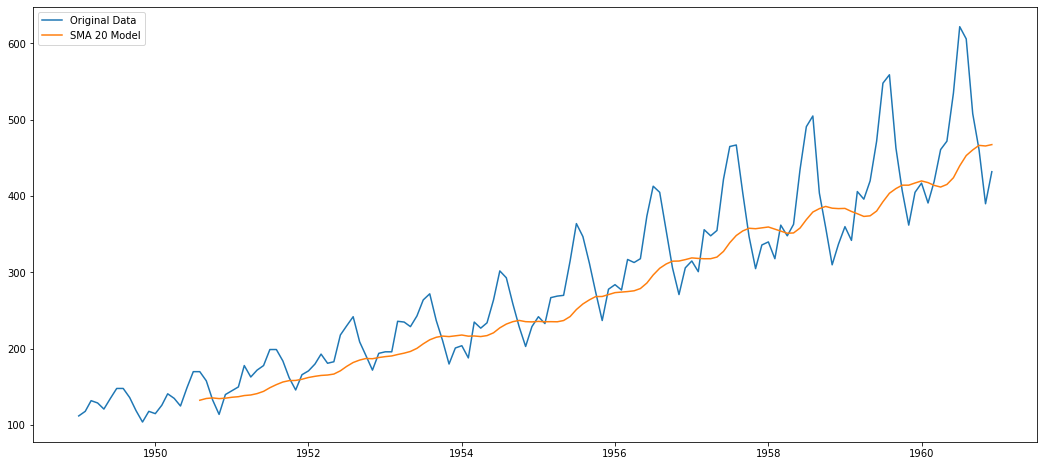

In [91]:
## plotting the graph to compare the predections by simple average model with the original data
plt.plot(df_ma20['No of Passengers'], label = 'Original Data')
plt.plot(df_ma20['SMA_20'], label = "SMA 20 Model")
plt.legend()

In [92]:
## calculating the mape
mape(df_ma20['No of Passengers'], df_ma20['SMA_20'])

12.390400960745353

### mape for different window sizes:


2 - 4.509723850655714

3 - 7.346647238927541

4 - 9.187719963528176

5 - 10.603771352445019

6 - 11.610217609232771

7 - 12.32225594988382

8 - 12.513798936616883

9 - 12.3154384661449

10 -11.926648168851692

11 - 11.477882523410551

12 - 10.778519137583197

13 - 10.229846710827953

14 - 10.037405927425242

15 - 10.30970063812442

16 - 10.745090493921825

17 - 11.353637224049821

18 - 11.876588285475998

19 - 12.214779359307476

20 - 12.390400960745353

## Observation : 
We have got the least error with the window size as 2

the mape value was increasing with the increase in the window size, but after the window size of 9, the mape value is decreasing and after 15 it again starts increasing 